In [1]:
import numpy as np
import cv2

bw = cv2.imread('images/detect_blob.png', 0)
height, width = bw.shape[0:2]

binary = np.zeros([height,width,1],'uint8')

thresh = 85

for row in range(0,height):
	for col in range(0, width):
		if bw[row][col]>thresh:
			binary[row][col]=255

ret, thresh = cv2.threshold(bw,thresh,255,cv2.THRESH_BINARY)
print(ret)


85.0


In [2]:
from matplotlib import pyplot as plt

def plot(images, titles):
    if len(images) != len(titles):
        raise ValueError("The number of images and titles must be the same.")
    
    cols = len(images)
    fig, axarr = plt.subplots(1, cols, figsize=(5 * cols, 5))

    for i in range(cols):
        ax = axarr[i] if cols > 1 else axarr
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        ax.set_title(titles[i])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

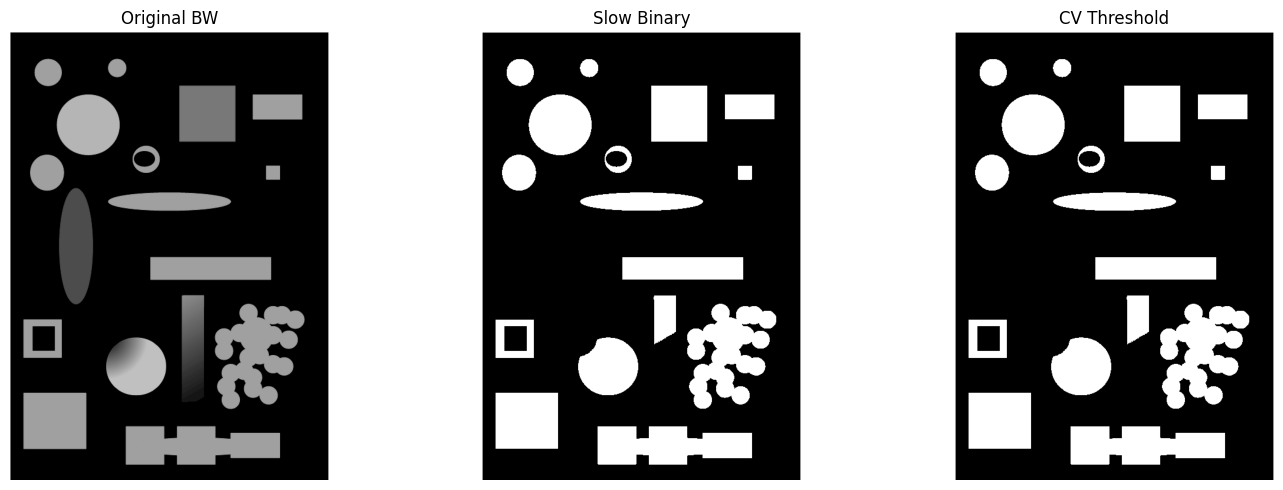

In [31]:
plot([bw, binary, thresh], ['Original BW', 'Slow Binary', 'CV Threshold'])

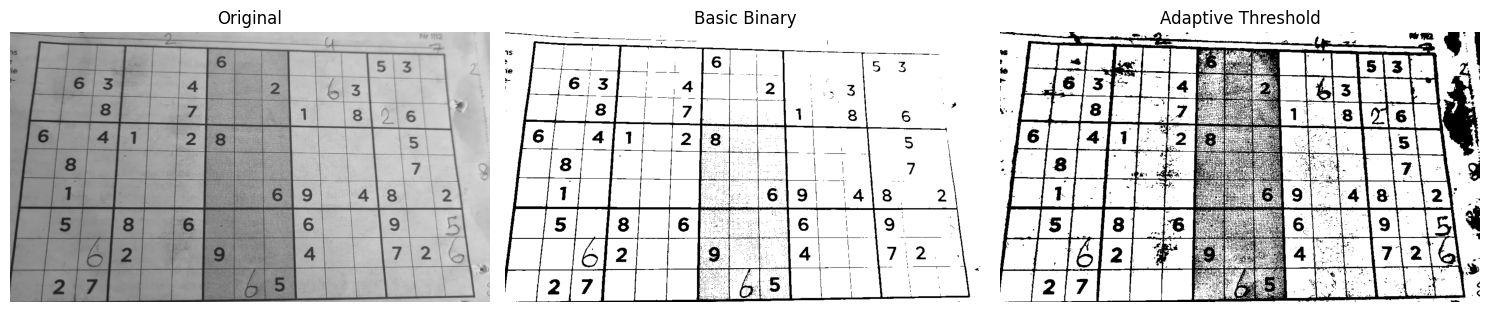

In [25]:
import numpy as np
import cv2

img = cv2.imread('images/sudoku.png',0)
#cv2.imshow("Original",img)

ret, thresh_basic = cv2.threshold(img,110,255,cv2.THRESH_BINARY)
#cv2.imshow("Basic Binary",thresh_basic)

thres_adapt = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 225, 1)
#cv2.imshow("Adaptive Threshold",thres_adapt)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

plot([img, thresh_basic, thres_adapt], ['Original', 'Basic Binary', 'Adaptive Threshold'])

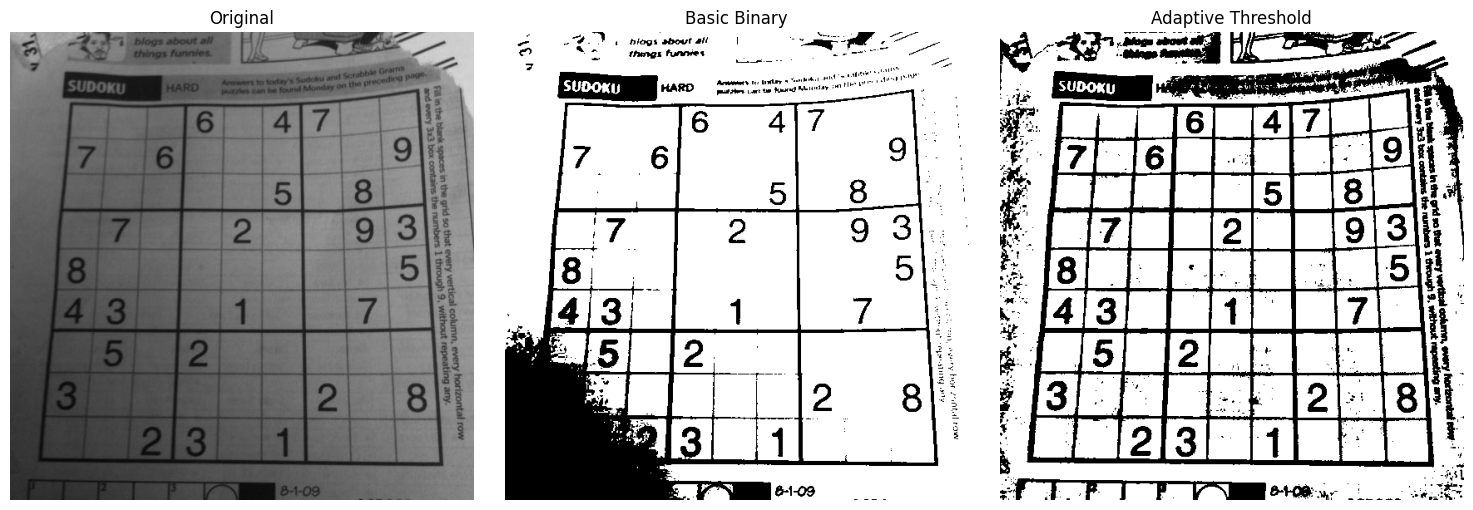

In [7]:
import numpy as np
import cv2

img = cv2.imread('images/sudoku2.png',0)

ret, thresh_basic = cv2.threshold(img,70,255,cv2.THRESH_BINARY)

thres_adapt = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)


plot([img, thresh_basic, thres_adapt], ['Original', 'Basic Binary', 'Adaptive Threshold'])


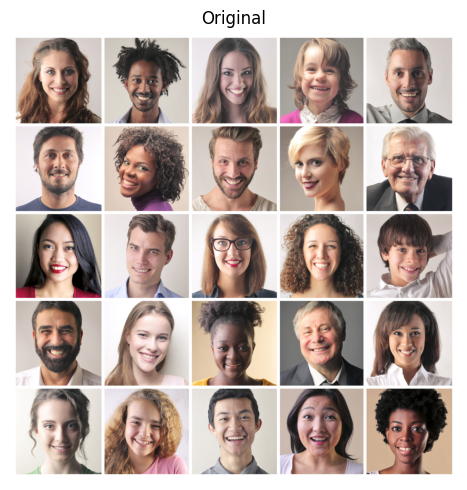

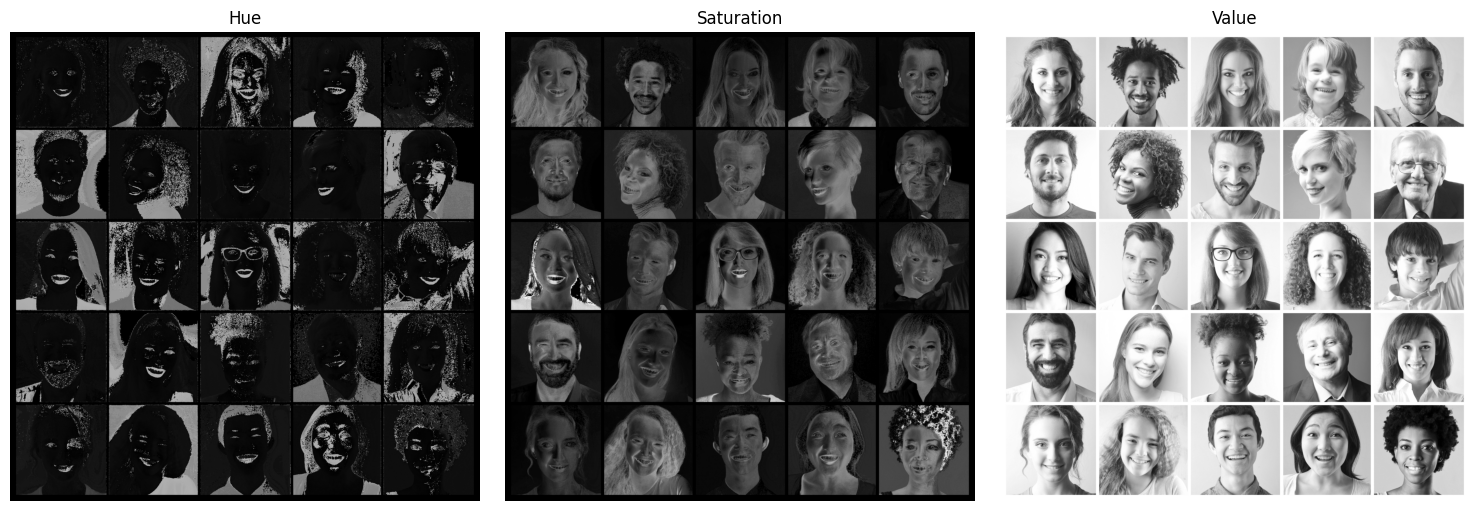

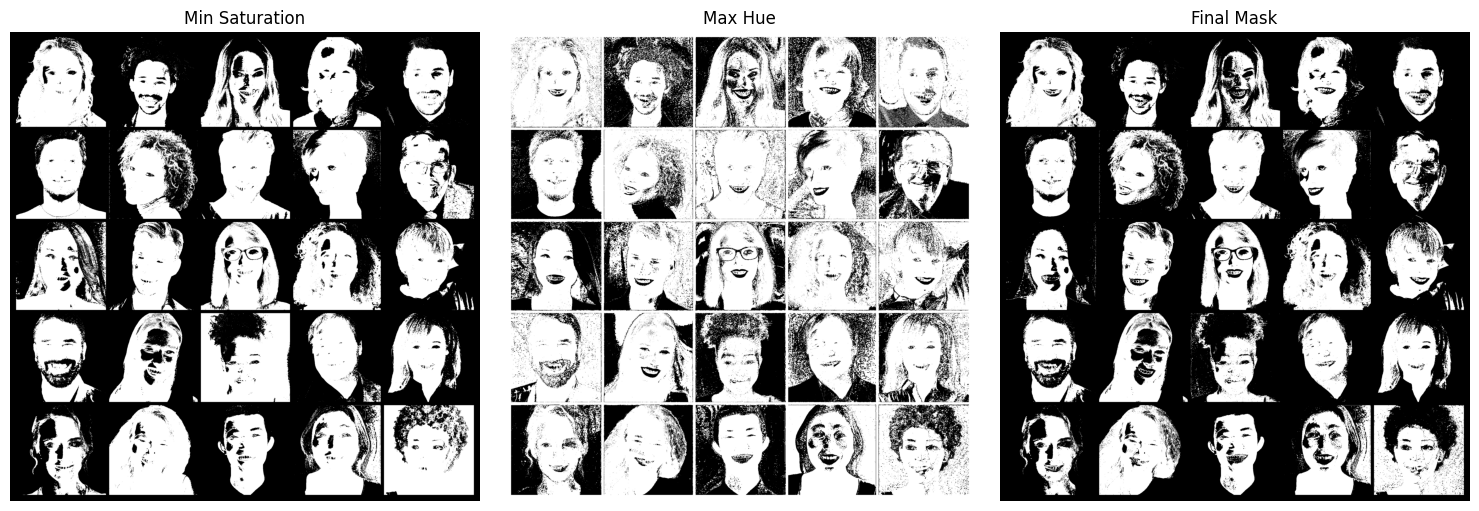

In [38]:
import numpy as np
import cv2

img = cv2.imread('images/faces.jpeg',1)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

hsv_split = np.concatenate((h,s,v), axis=1)
ret, min_sat = cv2.threshold(s,40,255, cv2.THRESH_BINARY)

ret, max_hue = cv2.threshold(h,15, 255, cv2.THRESH_BINARY_INV)

final = cv2.bitwise_and(min_sat,max_hue)

plot([img], ['Original'])

plot([h, s, v], ['Hue', 'Saturation', 'Value'])

plot([min_sat, max_hue, final], ['Min Saturation', 'Max Hue', 'Final Mask'])

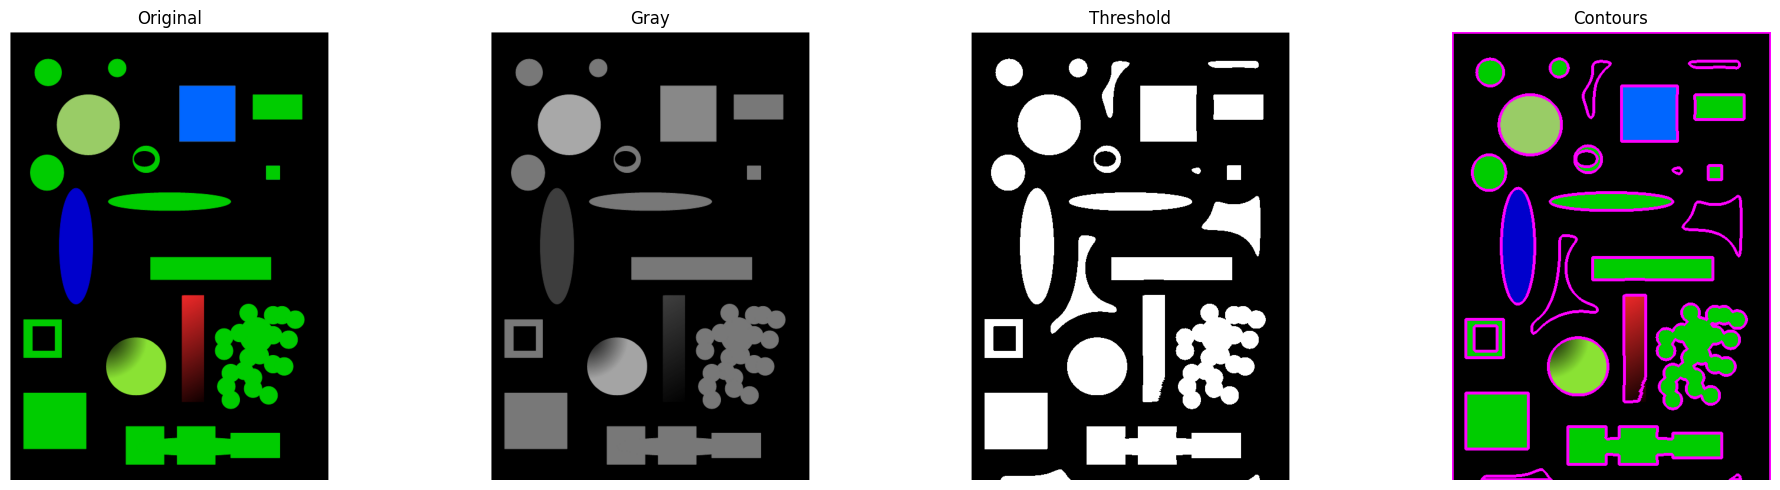

In [39]:
import numpy as np
import cv2

img = cv2.imread('images/detect_blob.png',1)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img2 = img.copy()
index = -1
thickness = 4
color = (255, 0, 255)

cv2.drawContours(img2, contours, index, color, thickness)

plot([img, gray, thresh, img2], ['Original', 'Gray', 'Threshold', 'Contours'])

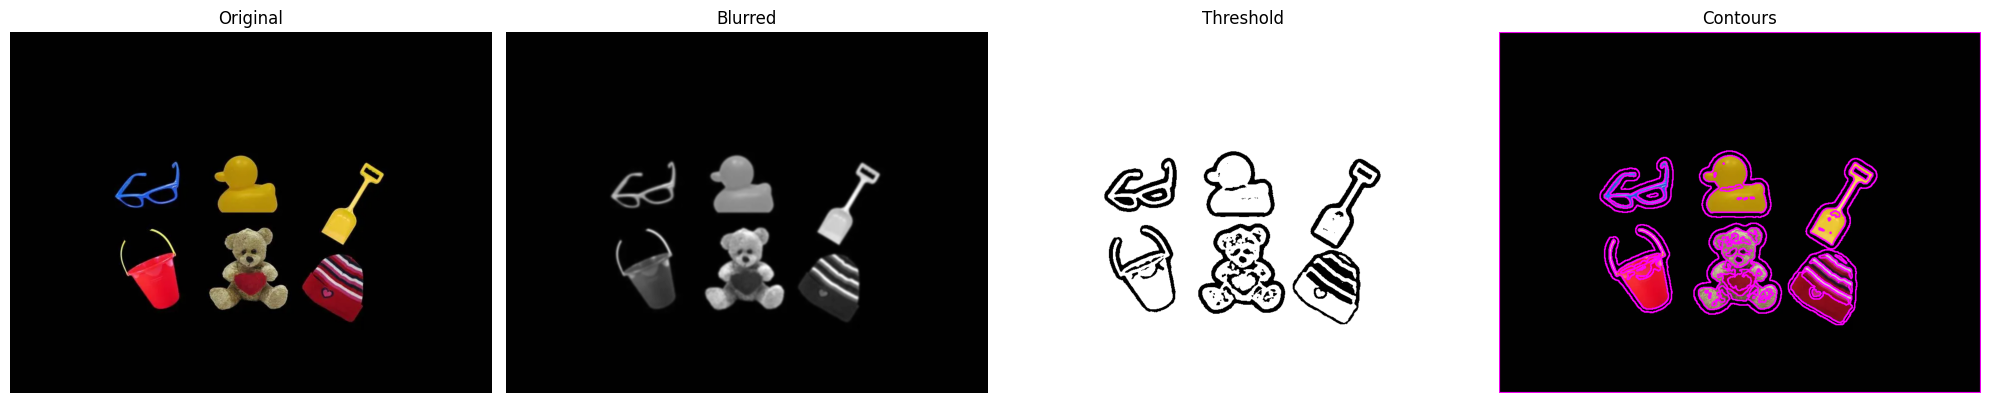

In [135]:
import numpy as np
import cv2

img = cv2.imread('images/objects.png',1)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Preprocess with blur to smooth lighting variation
blurred = cv2.GaussianBlur(gray, (9, 9), 0)

# Adaptive thresholding (gaussian)
thresh = cv2.adaptiveThreshold(
    blurred,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    blockSize=23,
    C=3
)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img2 = img.copy()
index = -1
thickness = 2
color = (255, 0, 255)

cv2.drawContours(img2, contours, index, color, thickness)

plot([img, blurred, thresh, img2], ['Original', 'Blurred', 'Threshold', 'Contours'])

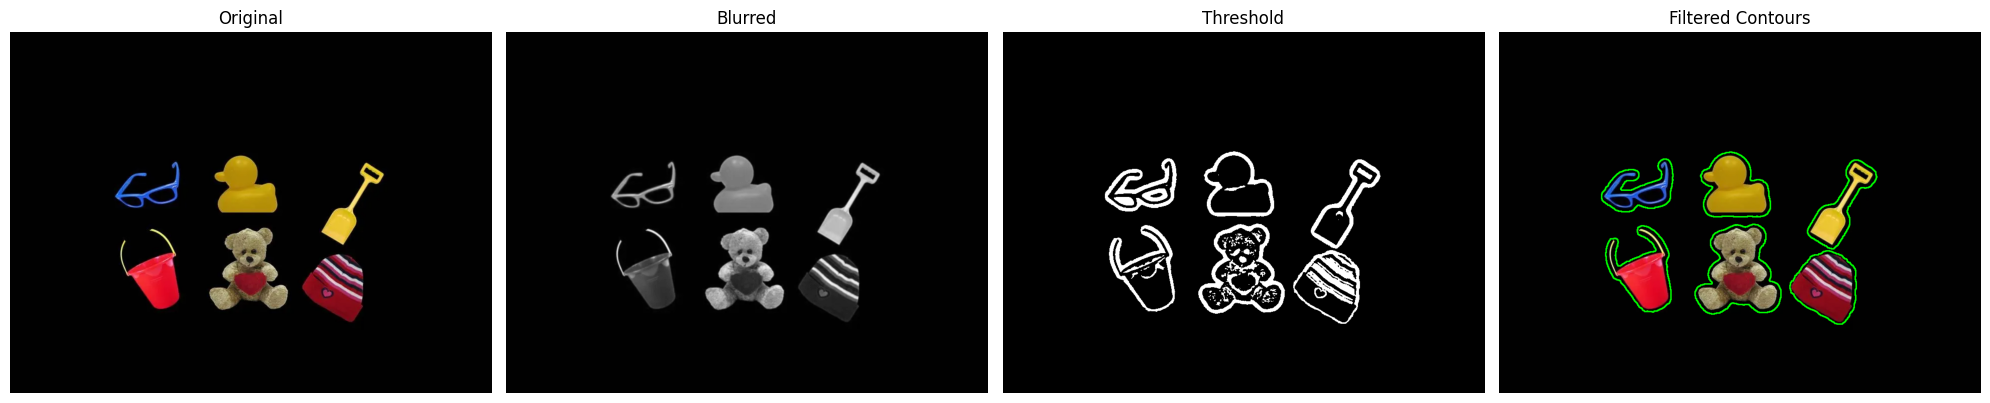

In [137]:
# Draw contours with filtering
img_contours = img.copy()
for cnt in contours:
    if cv2.contourArea(cnt) > 3000:
        cv2.drawContours(img_contours, [cnt], -1, (0, 255, 0), 2)

plot([img, blurred, thresh, img_contours], ['Original', 'Blurred', 'Threshold', 'Filtered Contours'])

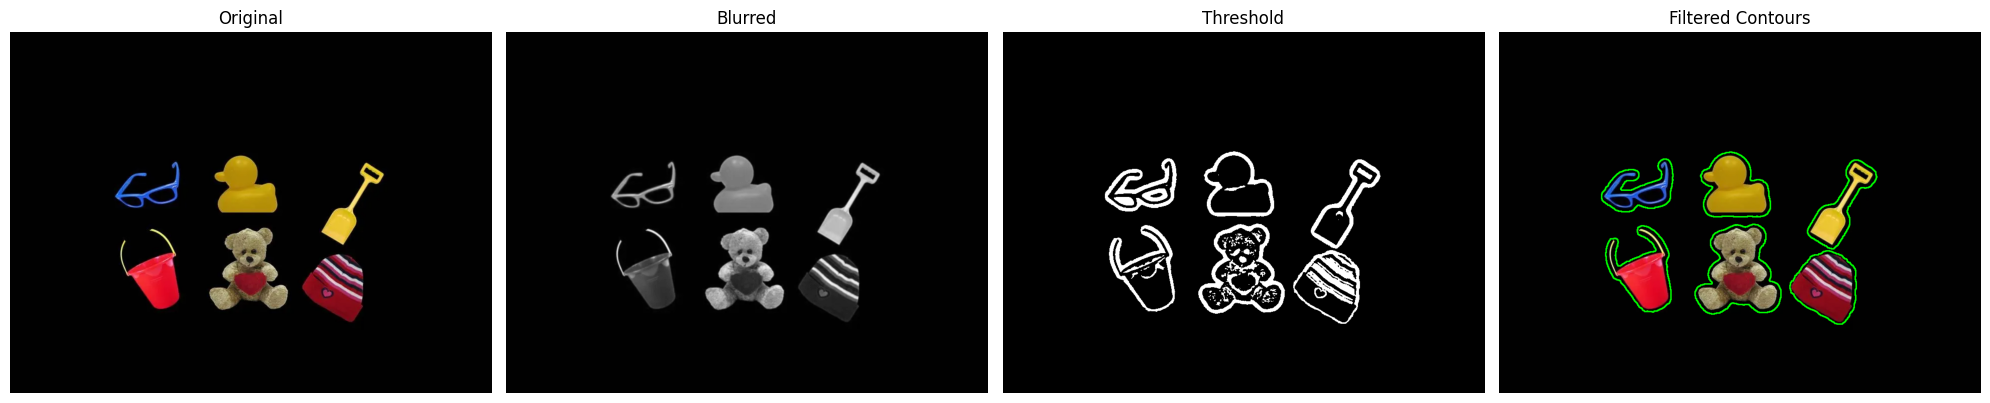

In [136]:
# Preprocess with blur to smooth lighting variation
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Adaptive thresholding (inverted)
thresh = cv2.adaptiveThreshold(
    blurred,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV,
    blockSize=27,
    C=5
)

# Morphology to clean up noise
kernel = np.ones((2, 2), np.uint8)
clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

# Find contours
contours, _ = cv2.findContours(clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours with filtering
img_contours = img.copy()
for cnt in contours:
    if cv2.contourArea(cnt) > 500:
        cv2.drawContours(img_contours, [cnt], -1, (0, 255, 0), 2)

# Plot results
plot(
    [img, blurred, thresh, img_contours],
    ['Original', 'Blurred', 'Threshold', 'Filtered Contours']
)


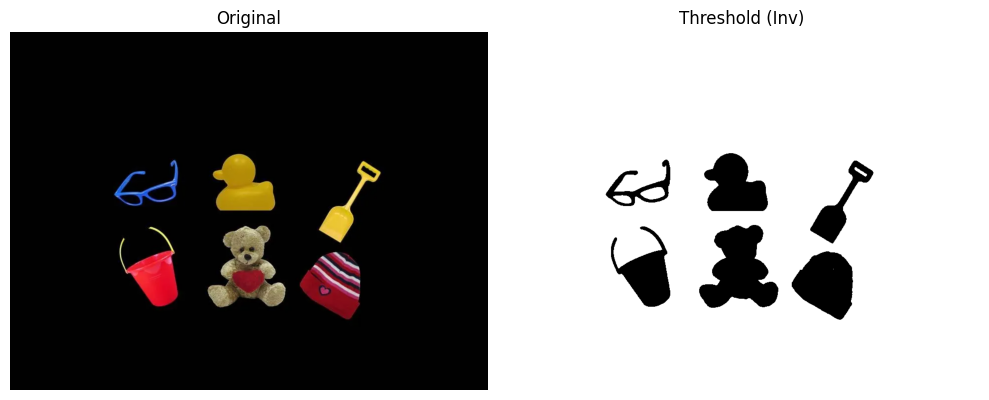

In [139]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


img = cv2.imread('images/objects.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Preprocessing
blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
_, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY_INV)

# Show results
plot([img, thresh],
     ['Original', 'Threshold (Inv)'])


Area: 86.5, perimeter: 45.55634891986847
Area: 959.5, perimeter: 251.8406196832657
Area: 13091.5, perimeter: 754.0416301488876
Area: 10069.5, perimeter: 401.41421353816986
Area: 7780.0, perimeter: 329.22034430503845
Area: 4160.0, perimeter: 258.0
Area: 1672.0, perimeter: 160.48528122901917
Area: 14515.0, perimeter: 1225.768675327301
Area: 6357.0, perimeter: 446.9116872549057
Area: 7718.0, perimeter: 484.8284270763397
Area: 4592.5, perimeter: 502.0315263271332
Area: 5014.0, perimeter: 357.2792183160782
Area: 5019.0, perimeter: 444.3675308227539
Area: 8829.0, perimeter: 450.5929263830185
Area: 108.0, perimeter: 41.79898953437805
Area: 551.5, perimeter: 93.41421353816986
Area: 2707.5, perimeter: 194.75230765342712
Area: 1644.5, perimeter: 152.1248904466629
Area: 767.0, perimeter: 105.74011433124542
Area: 3501.5, perimeter: 251.0710676908493
Area: 8556.0, perimeter: 345.70562493801117
Area: 8868.0, perimeter: 378.8284270763397
Area: 865.0, perimeter: 185.4558435678482
Area: 1482.0, perimet

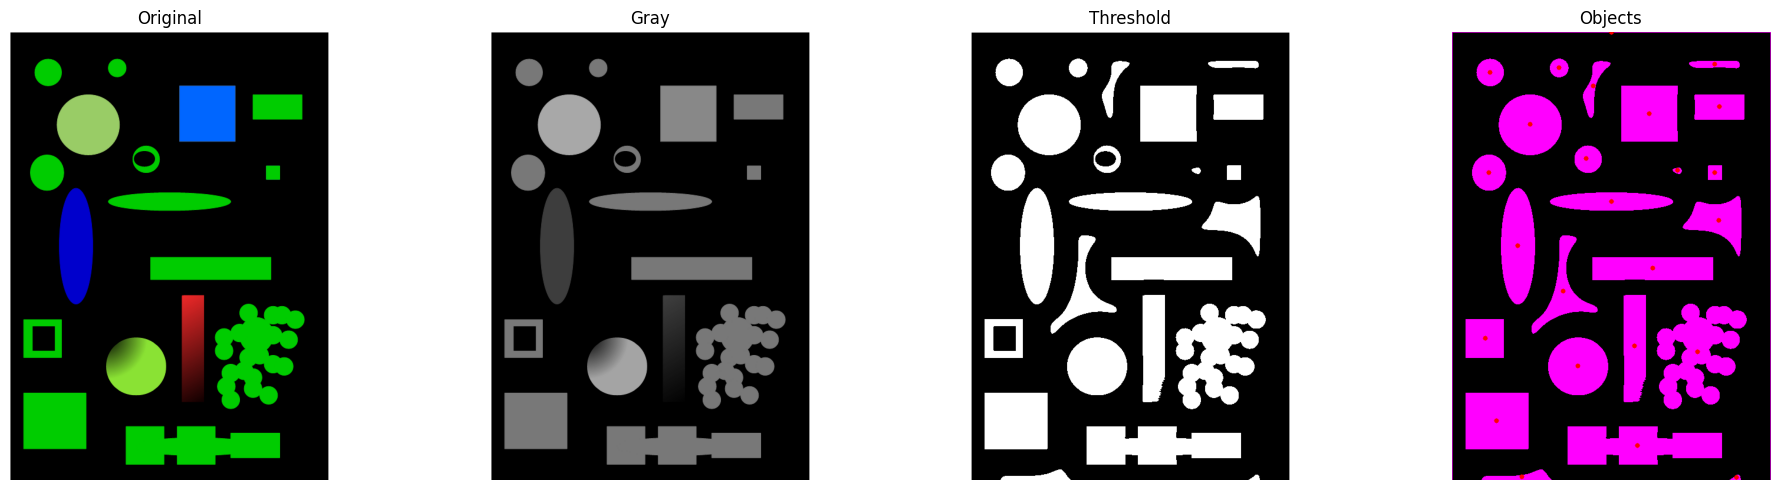

In [16]:
import numpy as np
import cv2

img = cv2.imread('images/detect_blob.png',1)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 1)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img2 = img.copy()

index = -1
thickness = 4
color = (255, 0, 255)

objects = np.zeros([img.shape[0], img.shape[1], 3], 'uint8')

for c in contours:
	cv2.drawContours(objects, [c], -1, color, -1)

	area = cv2.contourArea(c)
	perimeter = cv2.arcLength(c, True)

	M = cv2.moments(c)
	cx = int(M['m10'] / M['m00'])
	cy = int(M['m01'] / M['m00'])

	cv2.circle(objects, (cx, cy), 4, (0, 0, 255), -1)

	print(f"Area: {area}, perimeter: {perimeter}")

plot([img, gray, thresh, objects], ['Original', 'Gray', 'Threshold', 'Objects'])


Area: 8873.0, perimeter: 972.0
Area: 8.0, perimeter: 11.656854152679443
Area: 4.0, perimeter: 7.656854152679443
Area: 7.0, perimeter: 9.656854152679443
Area: 16.0, perimeter: 15.656854152679443
Area: 18.5, perimeter: 19.899494767189026
Area: 24.0, perimeter: 26.14213538169861
Area: 10.0, perimeter: 13.656854152679443
Area: 14.5, perimeter: 17.899494767189026
Area: 14.5, perimeter: 17.899494767189026
Area: 35.5, perimeter: 21.899494767189026
Area: 4.5, perimeter: 8.242640614509583
Area: 23.5, perimeter: 26.727921843528748
Area: 4.0, perimeter: 7.656854152679443
Area: 35.5, perimeter: 21.899494767189026
Area: 4.5, perimeter: 8.242640614509583
Area: 24.0, perimeter: 26.14213538169861
Area: 20.5, perimeter: 19.899494767189026
Area: 4.0, perimeter: 7.656854152679443
Area: 32.5, perimeter: 32.72792184352875
Area: 27.5, perimeter: 29.55634891986847
Area: 24.5, perimeter: 26.727921843528748
Area: 2.0, perimeter: 5.656854152679443
Area: 19.5, perimeter: 21.55634891986847
Area: 19.5, perimeter: 

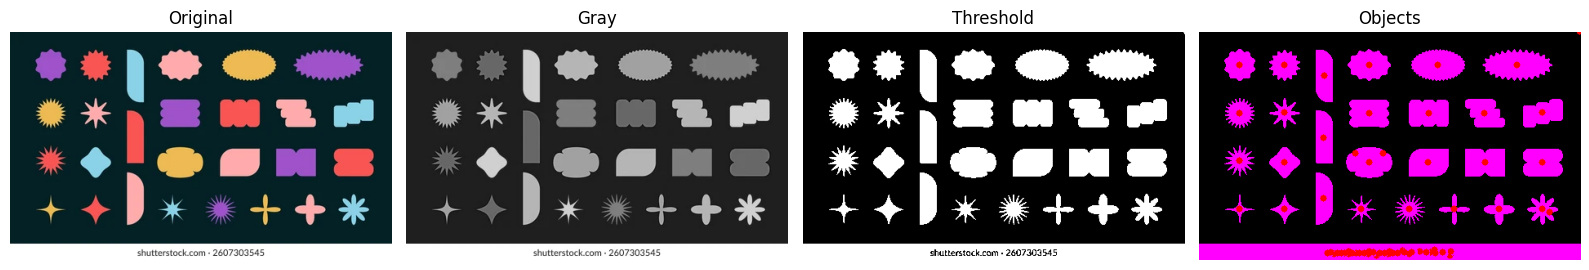

In [50]:
import numpy as np
import cv2

img = cv2.imread('images/figures.jpg',1)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 151, 1)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img2 = img.copy()

index = -1
thickness = 4
color = (255, 0, 255)

objects = np.zeros([img.shape[0], img.shape[1], 3], 'uint8')

for c in contours:
	cv2.drawContours(objects, [c], -1, color, -1)

	area = cv2.contourArea(c)
	perimeter = cv2.arcLength(c, True)

	M = cv2.moments(c)
	cx = int(M['m10'] / M['m00'])
	cy = int(M['m01'] / M['m00'])

	cv2.circle(objects, (cx, cy), 4, (0, 0, 255), -1)

	print(f"Area: {area}, perimeter: {perimeter}")

plot([img, gray, thresh, objects], ['Original', 'Gray', 'Threshold', 'Objects'])
